# Keras, Fashion MNIST Classification

In [1]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
# from keras.datasets import boston_housing
import matplotlib.pyplot as plt

## mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

so, we have 10 classes

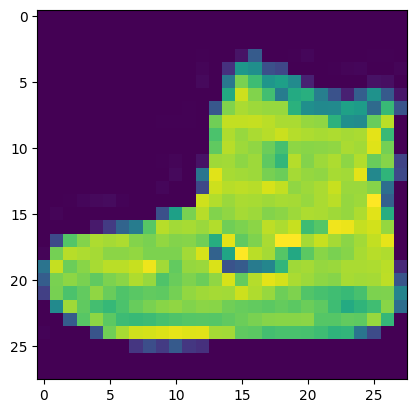

9


In [5]:
n = 0
# plt.imshow(train_images[n,:,:])
plt.imshow(train_images[n])
plt.show()
print(train_labels[n])

## DATA PREPROCESSING

## scaling

In [6]:
# train_images[0, 15:17]  # before normalization

In [7]:
# scaling of the images
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

In [8]:
# train_images[0, 15:17]  # after normalization

## flattening

In [9]:
# flattening images
train_images = train_images.reshape((-1, 784))  # 28 * 28 = 784
test_images = test_images.reshape((-1, 784))

In [10]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

## model assembling

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
model_1 = Sequential([
    Dense(1024, activation='tanh', input_shape=(784,)),
    Dense(512, activation='relu'),
    Dense(256, activation='tanh'),
    Dense(128, activation='relu'),
    Dense(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(16, activation='tanh'),
    Dense(10, activation='softmax'),
], name='model_one')

model_1.compile(
    optimizer='NAdam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [13]:
model_1.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                52

#### model configuration - .get_config()

In [14]:
# model_1.get_config()

## OHE of labels

In [15]:
# from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

In [16]:
# train_labels[:5]

In [17]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [18]:
# y_train[:5]

## training cycle

In [19]:
model_1_callback = model_1.fit(  # metrics and losses for each epoch are to be saved in 'model_1_callback' variable
    train_images,
    y_train,
    epochs=15,
    batch_size=512, 
    validation_split=0.2
)

Epoch 1/14
94/94 [==============================] - 6s 44ms/step - loss: 0.8853 - accuracy: 0.7674 - val_loss: 0.5620 - val_accuracy: 0.8507
Epoch 2/14
94/94 [==============================] - 4s 41ms/step - loss: 0.4834 - accuracy: 0.8635 - val_loss: 0.4424 - val_accuracy: 0.8683
Epoch 3/14
94/94 [==============================] - 4s 40ms/step - loss: 0.3983 - accuracy: 0.8785 - val_loss: 0.4104 - val_accuracy: 0.8743
Epoch 4/14
94/94 [==============================] - 4s 40ms/step - loss: 0.3466 - accuracy: 0.8906 - val_loss: 0.3730 - val_accuracy: 0.8803
Epoch 5/14
94/94 [==============================] - 4s 43ms/step - loss: 0.3140 - accuracy: 0.8982 - val_loss: 0.3547 - val_accuracy: 0.8842
Epoch 6/14
94/94 [==============================] - 4s 42ms/step - loss: 0.2909 - accuracy: 0.9025 - val_loss: 0.3531 - val_accuracy: 0.8813
Epoch 7/14
94/94 [==============================] - 4s 41ms/step - loss: 0.2673 - accuracy: 0.9110 - val_loss: 0.3586 - val_accuracy: 0.8785
Epoch 8/14
94

In [20]:
# evaluate the model
model_1.evaluate( 
    test_images,
    y_test
)

313/313 [==============================] - 1s 3ms/step - loss: 0.3768 - accuracy: 0.8767


[0.3767697215080261, 0.8766999840736389]

#### let's print metrics and losses for each epoch - .history

In [21]:
# model_1_callback.history

## learning curve

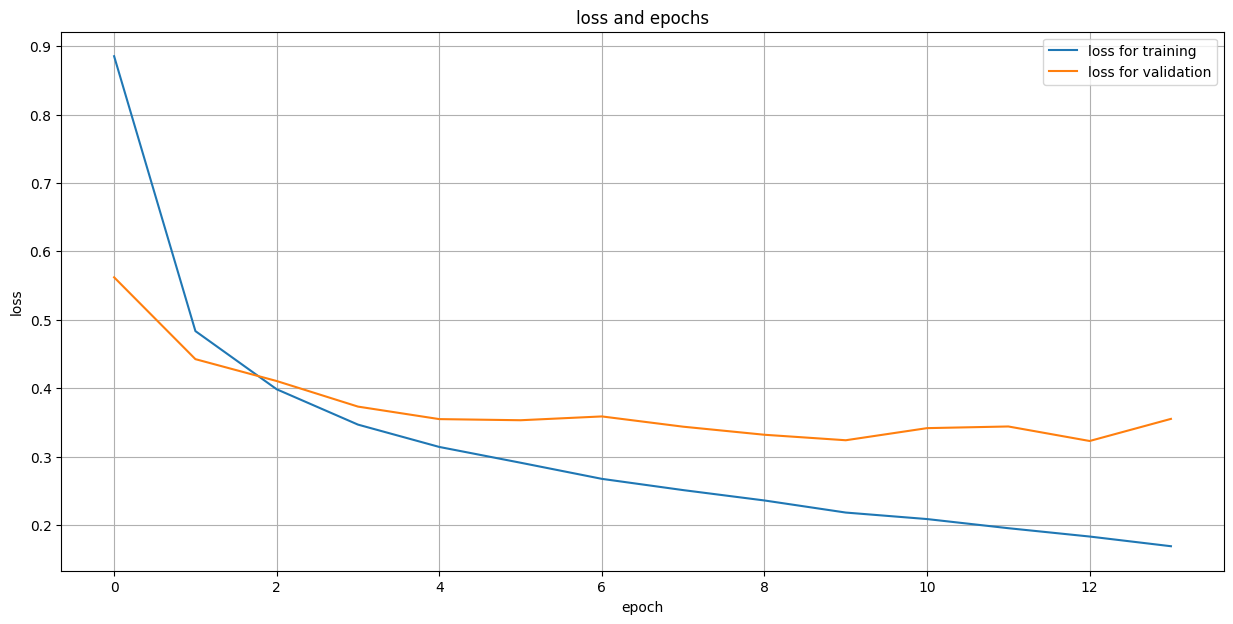

In [22]:
plt.figure(figsize=(15,7))
plt.plot(model_1_callback.history['loss'], label = 'loss for training')
plt.plot(model_1_callback.history['val_loss'], label = 'loss for validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('loss and epochs')
plt.show()

## saving and loading model weights

In [23]:
# saving model weights
# model_2.save_weights('model_2.h5')

# loading model weights
# model_2.load_weights('model_2.h5')

## testing different optimizers

Эксперимент с разными оптимизаторами для одной начальной модели:

  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных



Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…

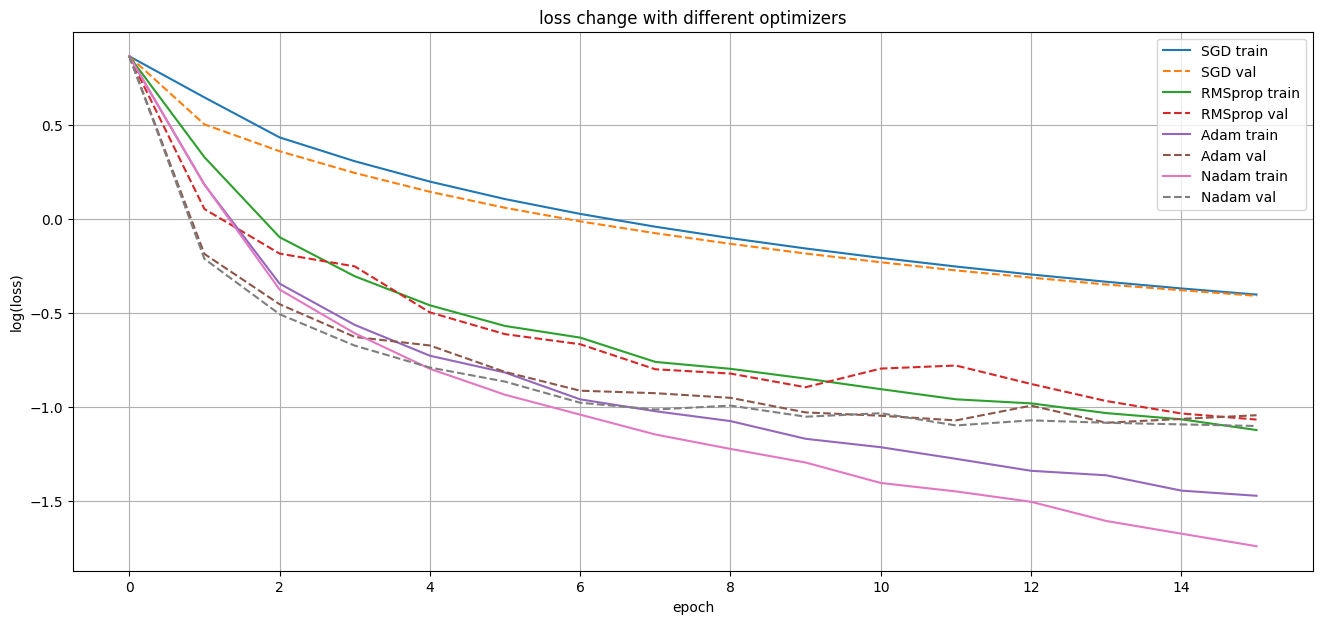

In [24]:
model = Sequential([
    Dense(1024, activation='tanh', input_shape=(784,)),
    Dense(512, activation='relu'),
    Dense(256, activation='tanh'),
    Dense(128, activation='relu'),
    Dense(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(16, activation='tanh'),
    Dense(10, activation='softmax'),
])

# saving weights of the model
# the model is not fitted/trained!!!
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# setting epochs
epochs = 15
# vector for plotting results
epochs_vector = np.arange(epochs+1)

# trying different optimizers
for optimizer_ in ['SGD', 'RMSProp', 'adam', 'NAdam']:
    # creation of a working model 'model_' where we will load weights saved before
    model_ = Sequential([
        Dense(1024, activation='tanh', input_shape=(784,)),
        Dense(512, activation='relu'),
        Dense(256, activation='tanh'),
        Dense(128, activation='relu'),
        Dense(64, activation='tanh'),
        Dense(32, activation='relu'),
        Dense(16, activation='tanh'),
        Dense(10, activation='softmax'),
    ])
    
    # loading weights
    model_.load_weights('model.h5')
    
    # compiling model_ with an optimizer
    model_.compile(
        optimizer=optimizer_,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # computing loss before fitting/training
    loss_train_0 = model_.evaluate(train_images[:48000], to_categorical(train_labels[:48000]), verbose=0)[0]
    loss_valid_0 = model_.evaluate(train_images[48000:], to_categorical(train_labels[48000:]), verbose=0)[0]
    
    # model_ fitting/training
    metrics_and_losses = model_.fit(  # metrics_and_losses is model's callback
        train_images,
        to_categorical(train_labels),
        epochs=epochs,
        batch_size=1024, validation_split=0.2, verbose = 0
    )
    
    # plot
    plt.plot(epochs_vector, 
             np.log([loss_train_0]+metrics_and_losses.history['loss']),
             '-',
             label=model_.optimizer.get_config()['name']+' train')
    plt.plot(epochs_vector, 
             np.log([loss_valid_0]+metrics_and_losses.history['val_loss']),
             '--',
             label=model_.optimizer.get_config()['name']+' val')
    
plt.legend()
plt.grid('On')

plt.title('loss change with different optimizers')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [25]:
model_.optimizer.get_config()

{'name': 'Nadam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

## predictions (with the last model in the cycle above)

1/1 [==============================] - 0s 180ms/step


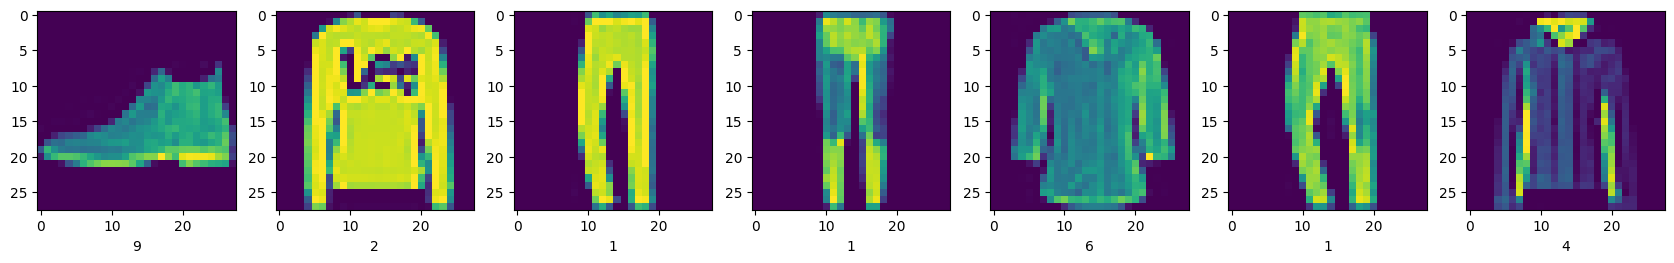

In [26]:
n = 7
y_pred = model_.predict(test_images[:n])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize =(3*n, 5))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(test_images[i, :].reshape(28, 28))
    plt.xlabel(str(y_pred_class[i]))
plt.show()

In [27]:
y_pred.shape, y_pred[0]

((7, 10),
 array([1.4707558e-03, 4.1680250e-04, 6.6974033e-05, 5.2028518e-05,
        5.2331871e-04, 3.4524861e-03, 1.6633938e-03, 5.6789923e-03,
        2.0930842e-03, 9.8458225e-01], dtype=float32))

In [28]:
y_pred_class

array([9, 2, 1, 1, 6, 1, 4], dtype=int64)

In [29]:
test_labels[:n]

array([9, 2, 1, 1, 6, 1, 4], dtype=uint8)

#### syntax variant

In [30]:
y_pred = model_(test_images[:n])  # the same as 'model_.predict(test_images[:n])'
np.argmax(y_pred, axis=1)

array([9, 2, 1, 1, 6, 1, 4], dtype=int64)

## indexes of wrongly predicted objects

In [31]:
y_pred = model_(test_images)  # all test images label prediction
y_pred = np.argmax(y_pred, axis=1)
np.where(test_labels != y_pred)[0]

array([  12,   17,   23, ..., 9979, 9981, 9991], dtype=int64)

In [41]:
accuracy = (len(test_labels) - len(np.where(test_labels != y_pred)[0]))/len(test_labels)
accuracy

0.8904